## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [1]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd

# Loading the dataset
df = pd.read_csv("datasets/worldwide_browser_trends.csv")

# Displaying basic information and the first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              202 non-null    object
 1   Firefox            202 non-null    int64 
 2   Safari             202 non-null    int64 
 3   Google Chrome      202 non-null    int64 
 4   Internet Explorer  202 non-null    int64 
 5   Opera              202 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.6+ KB


,Month,Firefox,Safari,Google Chrome,Internet Explorer,Opera
0,2004-01,12,2,2,37,9
1,2004-02,20,2,2,39,9
2,2004-03,18,2,2,34,8
3,2004-04,20,2,2,33,9
4,2004-05,20,2,2,35,9


In [2]:
# Converting the 'Month' column to datetime format and setting it as the index
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# Checking out the updated dataframe with the new index
df.head()

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,12,2,2,37,9
2004-02-01,20,2,2,39,9
2004-03-01,18,2,2,34,8
2004-04-01,20,2,2,33,9
2004-05-01,20,2,2,35,9


In [3]:
# Now, let's calculate the six-month rolling average for smooth trends
rolling_six = df.rolling(window=6).mean()

# Taking a look at the first few rows to see how the rolling average looks
rolling_six.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,NaN,NaN,NaN,NaN,NaN
2004-05-01,NaN,NaN,NaN,NaN,NaN
2004-06-01,19.833333,2.0,1.833333,35.500000,9.000000
2004-07-01,24.666667,2.0,1.833333,35.166667,9.333333
2004-08-01,26.833333,2.0,1.833333,34.166667,9.333333
2004-09-01,31.166667,2.0,1.833333,33.833333,9.500000


In [4]:
# Calculating the quarterly percentage change to see how the data shifts every 3 months
pct_change_quarterly = df.pct_change(periods=3) * 100

# Filtering out Chrome's data before 2009 to focus on more recent trends
pct_change_quarterly = pct_change_quarterly.loc['2009-01-01':]

# Checking out the first few rows of the percentage change to make sure it's working
pct_change_quarterly.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2009-01-01,4.545455,25.000000,0.000000,9.090909,0.000000
2009-02-01,-1.515152,20.000000,0.000000,9.090909,-9.090909
2009-03-01,-7.042254,40.000000,-13.333333,20.000000,-8.333333
2009-04-01,-7.246377,0.000000,23.076923,20.833333,-9.090909
2009-05-01,-6.153846,-16.666667,25.000000,8.333333,0.000000
2009-06-01,-6.060606,0.000000,15.384615,-16.666667,-9.090909
2009-07-01,14.062500,20.000000,12.500000,-6.896552,0.000000
2009-08-01,18.032787,0.000000,20.000000,0.000000,10.000000
2009-09-01,8.064516,-14.285714,33.333333,-4.000000,30.000000


In [5]:
# Extracting Chrome search interest data for specific years: 2009, 2012, 2015, and 2018
chrome_trends = df[df.index.year.isin([2009, 2012, 2015, 2018])]

# Reshaping the data so we can view the months as rows and years as columns
chrome_trends = chrome_trends.pivot_table(values='Google Chrome', index=chrome_trends.index.month, columns=chrome_trends.index.year)

# Displaying the first 12 months for these years
chrome_trends.head(12)

Month,2009,2012,2015,2018
Month,,,,
1,13.0,52.0,48.0,24.0
2,12.0,50.0,45.0,24.0
3,13.0,47.0,42.0,24.0
4,16.0,47.0,47.0,22.0
5,15.0,48.0,46.0,23.0
6,15.0,45.0,43.0,22.0
7,18.0,51.0,44.0,20.0
8,18.0,53.0,43.0,21.0
9,20.0,50.0,41.0,25.0


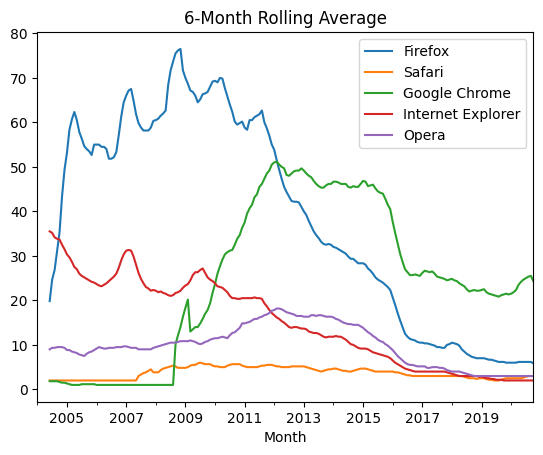

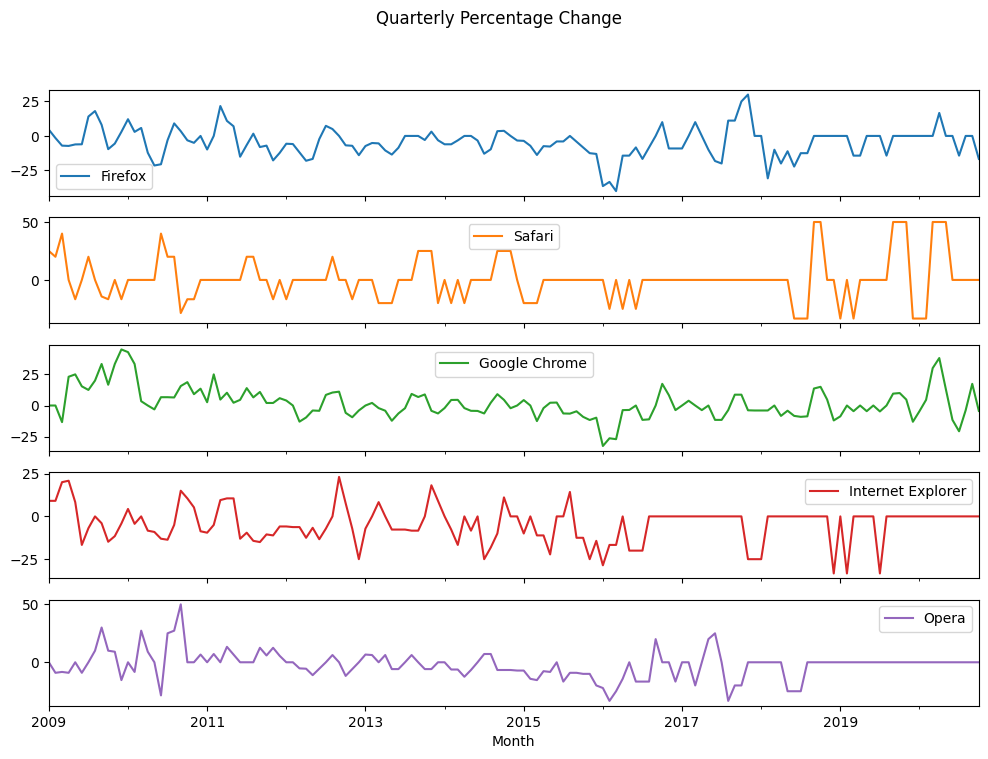

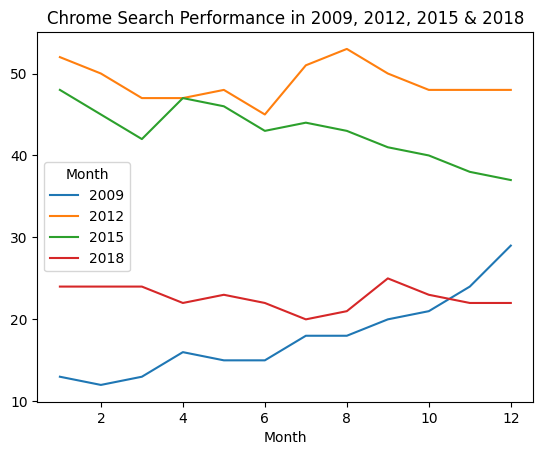

In [6]:
import matplotlib.pyplot as plt

# Plotting the 6-month rolling average to visualize smooth trends
rolling_six.plot(title="6-Month Rolling Average")
plt.show()

# Plotting the quarterly percentage change to see how things have shifted every 3 months
pct_change_quarterly.plot(subplots=True, figsize=(12,8), title="Quarterly Percentage Change")
plt.show()

# Plotting Chrome's search performance for the selected years (2009, 2012, 2015, 2018)
chrome_trends.plot(title="Chrome Search Performance in 2009, 2012, 2015 & 2018")
plt.show()